In [1]:
from dfLoader import *
from dataAug import *
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [2]:
annAudioDic = {
    'BritishBatCalls_MartynCooke_2018_1_sec_train_expert.json':'bat_data_martyn_2018/',
    'BritishBatCalls_MartynCooke_2018_1_sec_test_expert.json':'bat_data_martyn_2018_test/',
    'BritishBatCalls_MartynCooke_2019_1_sec_test_expert.json':'bat_data_martyn_2019_test/',
    'BritishBatCalls_Martyn(Cooke_2019_1_sec_train_expert.json':'bat_data_martyn_2019/',
    'bcireland_expert.json':'bcireland/',
    'sn_scot_nor_0.5_expert.json':'sn_scot_nor/',
    'Echobank_train_expert.json':'echobank/',
    'BCT_1_sec_train_expert.json':'BCT_1_sec/'
}



In [3]:
def getDataLoader(batchSize,ifAug,ifTrain):

    dfList = []

    if ifTrain:
        audioDic = trainAudioDic
    else:
        audioDic = testAudioDic

    for annName in audioDic:
        annPath = '../annotations/' + annName
        audioPath = '../audio/' + audioDic[annName]
        df = dfLoader(annPath, audioPath, False)
        dfList.append(df)

    finalDF = pd.concat(dfList)
    return finalDF

# def getDataLoader(batchSize,ifAug,ifTrain):

#     noiseList = []
#     dfList = []

#     if ifTrain:
#         audioDic = trainAudioDic
#     else:
#         audioDic = testAudioDic

#     for annName in audioDic:
#         annPath = '../annotations/' + annName
#         audioPath = '../audio/' + audioDic[annName]
#         df = dfLoader(annPath, audioPath)
#         noises = getNoiseList(df, audioPath, 300)
#         noiseList.extend(noises)
#         dfList.append(df)

#     finalDF = pd.concat(dfList)
#     # print(finalDF['class'].unique())
#     dataLoader = genDataLoader(batchSize,finalDF,ifAug, noiseList)
#     return dataLoader

def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(spec, origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    fig.set_size_inches(3, 10)
#     plt.show(block=False)
    
def augDataSingle(data):
        
    # print(data.shape)
    aug_spec = timeMasking(data, 10)
    # print(aug_spec.shape)
    aug_spec = freqMasking(aug_spec, 40)
    # print(aug_spec.shape)
    aug_spec = batchRandomStretch(aug_spec,0.2)
    # print(aug_spec.shape)
    blurrer = VT.GaussianBlur(kernel_size=(5, 5), sigma=(0.1,1.0))
    # print(aug_spec.shape)
    aug_spec = blurrer(aug_spec)
    return aug_spec

def genAugData(data ):

    augData = []
    
    print(f' the length of input data is {len(data)}')

    blurrer = VT.GaussianBlur(kernel_size=(5, 5), sigma=(0.1,1.0))

    for i in range(len(data)):
        aug_spec = data[i]
        print(f'aug_spec shape is {aug_spec.size()}')
        aug_spec = timeMasking(data[i], 10)
        print(f'aug_spec shape is {aug_spec.size()}')

        aug_spec = freqMasking(aug_spec, 40)
        print(f'aug_spec shape is {aug_spec.size()}')

        aug_spec = randomStretch(aug_spec,0.2)
        print(f'aug_spec shape is {aug_spec.size()}')

        aug_spec = blurrer(aug_spec.view(1,128,32)).view(128,32)

        
        augData.append(aug_spec)

    augData = torch.stack(augData)


    return augData

In [4]:
train_DF = getDataLoader(20,False, True)

# Try plot autoencoder

In [5]:
plot_spectrogram(X[344])

NameError: name 'X' is not defined

In [ ]:
X = []
y = []

for index, row in train_DF.iterrows():
    reshapeData = row['data']
    X.append(reshapeData)
    y.append(row['label'])
    

X = torch.Tensor(np.array(X))
y = torch.Tensor(np.array(y))

In [ ]:
data = X[455]

In [73]:
def plot_encoder_result(spec, spec2, title, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
    axs[0].set_title( "Origin")
    axs[0].set_ylabel(ylabel)
    axs[0].set_xlabel("frame")
    im0 = axs[0].imshow(spec, origin="lower", aspect=aspect)
    
    axs[1].set_title("Reconstructed")
    axs[1].set_xlabel("frame")
    im1 = axs[1].imshow(spec2, origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im0, ax=axs[1])
    fig.colorbar(im1, ax=axs[0])
    fig.set_size_inches(8, 10)
    fig.suptitle(title, fontsize=16)

    
    plt.savefig(f'{title}.png', dpi=150)
    

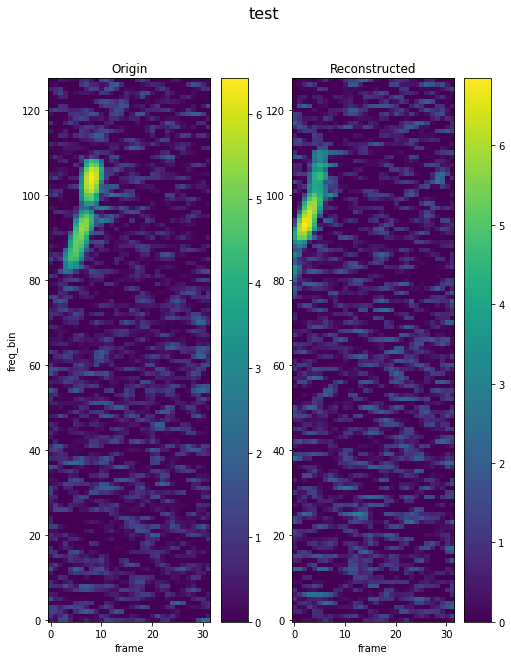

In [74]:
plot_encoder_result(X[455],X[344],'test')

# Check Batch Data Augumentation

In [6]:
X = []
y = []

for index, row in train_DF.iterrows():
    reshapeData = row['data']
    X.append(reshapeData)
    y.append(row['label'])
    

X = torch.Tensor(np.array(X))
y = torch.Tensor(np.array(y))

In [7]:
len(X)

15585

In [7]:
X_aug = augDataSingle(X)

In [84]:
exp = T.RandomErasing(p=1,scale=(0.10, 0.40),ratio=(0.3, 0.9))(X[6678].view(-1,128,32))

In [9]:
X[1].shape

torch.Size([128, 32])

In [69]:
random.randint(0,10)




2

In [11]:
exp = torch.roll(X[6689],10, dims = 0)

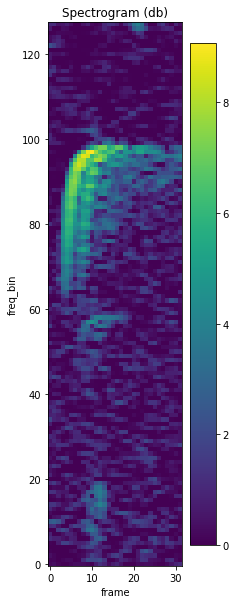

In [9]:
plot_spectrogram(X[6689].view(128,32))

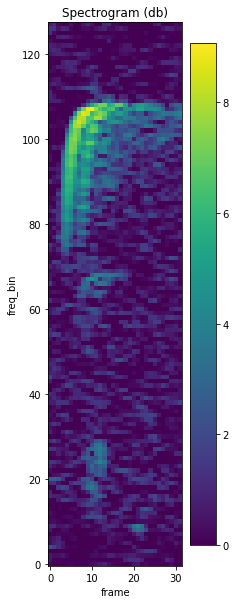

In [12]:
plot_spectrogram(exp.view(128,32))

In [8]:
X_aug.size()

torch.Size([15585, 1, 128, 32])

In [43]:
X_aug_2 = genAugData(torch.clone(X)).view(-1,1,128,32)

 the length of input data is 15585
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_s

aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])
aug_spec shape is torch.Size([128, 32])


In [32]:
X_aug_2.view(-1,1,128,32).size()

torch.Size([15585, 1, 128, 32])

ValueError: fname must be a PathLike or file handle

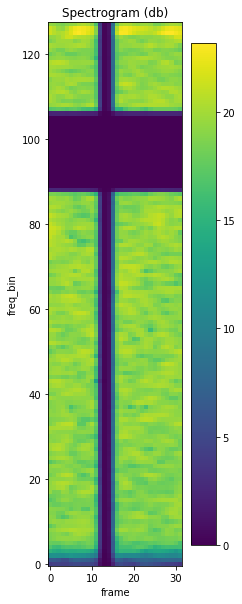

In [34]:
plot_spectrogram(X_aug_2[765].view(-1,1,128,32).view(128,32))

In [39]:
X_aug.shape

torch.Size([15585, 128, 32])

In [49]:
X_aug = genAugData(X)

 the length of input data is 15585


ValueError: fname must be a PathLike or file handle

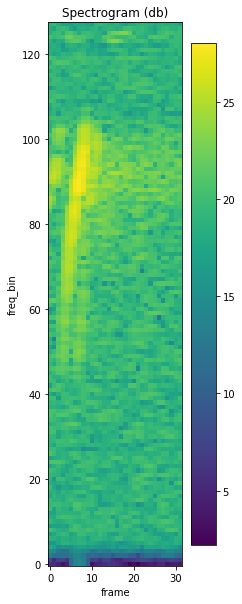

In [16]:
plot_spectrogram(X[89])

AttributeError: 'NoneType' object has no attribute 'write'

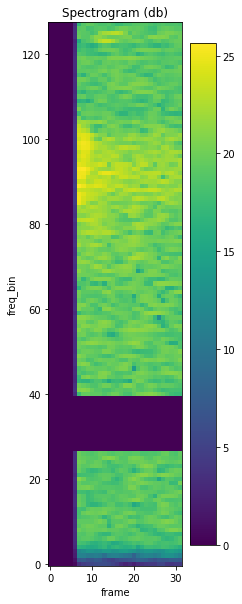

In [32]:
plot_spectrogram(X_aug[89])

# Check Single Data Augumentation

In [36]:
for data,label in train_DF:
    print(data.shape)
    org = torch.clone(data.view(-1,1,128,32))
    a = augDataSingle(data.view(-1,1,128,32))
    break

torch.Size([20, 128, 32])


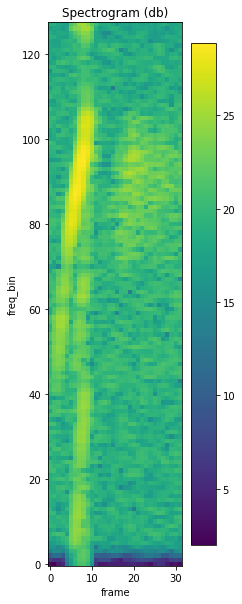

In [37]:
plot_spectrogram(org[0].view(128,32))

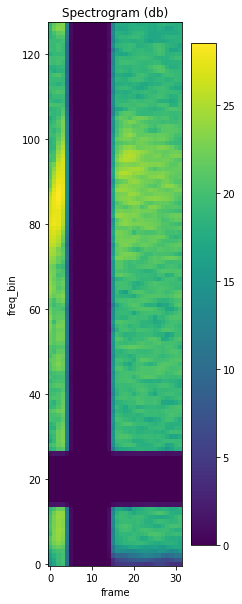

In [38]:
plot_spectrogram(a[0].view(128,32))

In [4]:
def getDataLoader(batchSize,ifAug,ifTrain):

    dfList = []

    if ifTrain:
        audioDic = trainAudioDic
    else:
        audioDic = testAudioDic

    for annName in audioDic:
        annPath = '../annotations/' + annName
        audioPath = '../audio/' + audioDic[annName]
        df = dfLoader(annPath, audioPath)
        dfList.append(df)

    finalDF = pd.concat(dfList)
    return finalDF

In [11]:
train_DF = getDataLoader(20,False, True)

In [5]:
test_DF = getDataLoader(20,False, False)

In [12]:
train_DF

,class,end_time,event,high_freq,individual,low_freq,start_time,id,duration,trimInTime,trimOutTime,data,len,label
0,Myotis daubentonii,0.283853,Echolocation,52490.234375,0,34667.968750,0.280166,myotis_daubentonii_24740175.wav,0.003686,0.280166,0.300166,"[[4.63542821636959, 4.405641527066756, 4.92373...",32,0
1,Myotis daubentonii,0.342426,Echolocation,53710.937500,0,33691.406250,0.338330,myotis_daubentonii_24740175.wav,0.004096,0.338330,0.358330,"[[3.67710510396412, 1.590580275736343, 2.71368...",32,0
2,Myotis daubentonii,0.419840,Echolocation,63232.421875,0,34667.968750,0.415744,myotis_daubentonii_24740175.wav,0.004096,0.415744,0.435744,"[[3.711632374899375, 3.4027119785924986, 1.946...",32,0
3,Myotis daubentonii,0.502170,Echolocation,64208.984375,0,28320.312500,0.497254,myotis_daubentonii_24740175.wav,0.004915,0.497254,0.517254,"[[3.088112391362725, 4.331404061906946, 4.3515...",32,0
4,Myotis daubentonii,0.703283,Echolocation,83740.234375,0,27343.750000,0.697549,myotis_daubentonii_24740175.wav,0.005734,0.697549,0.717549,"[[4.983261660982089, 4.532020926672244, 6.0217...",32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Myotis mystacinus,0.656667,Echolocation,53222.656250,0,32714.843750,0.652552,00297_myotis_mystacinus_0_1.0.wav,0.004115,0.652552,0.672552,"[[2.0625529389861414, 2.388691886158918, 1.466...",32,6
2335,Myotis mystacinus,0.559974,Echolocation,57128.906250,0,31982.421875,0.555448,00297_myotis_mystacinus_0_1.0.wav,0.004526,0.555448,0.575448,"[[3.681770334110127, 3.5818632601056573, 3.078...",32,6
2336,Myotis mystacinus,0.399094,Echolocation,58349.609375,0,30273.437500,0.394156,00297_myotis_mystacinus_0_1.0.wav,0.004938,0.394156,0.414156,"[[4.396318133504761, 3.4327775726892407, 5.110...",32,6
2337,Myotis mystacinus,0.237391,Echolocation,59082.031250,0,31005.859375,0.232865,00297_myotis_mystacinus_0_1.0.wav,0.004526,0.232865,0.252865,"[[3.8422066985860157, 3.72167725594152, 4.1021...",32,6


In [20]:
datas = np.array(train_DF[train_DF['class'] == 'Myotis brandtii'].data.tolist())

In [21]:
test_datas = np.array(test_DF[test_DF['class'] == 'Myotis brandtii'].data.tolist())

In [24]:
avg = np.average(datas,axis=0)

hi


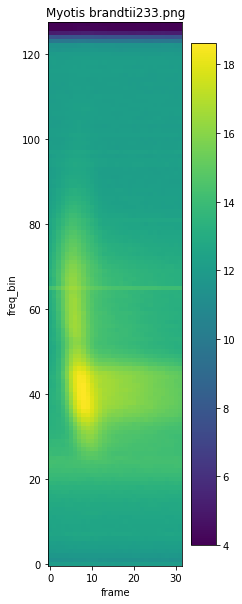

In [42]:
plot_spectrogram(np.flip(np.average(test_datas,axis=0),0), title = 'Myotis brandtii233.png')
print('hi')

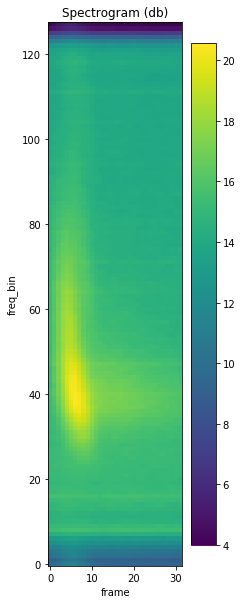

In [29]:
plot_spectrogram(np.flip(avg,0))

In [16]:
train_class = train_DF['class'].unique()

In [17]:
test_class = test_DF['class'].unique()

In [ ]:
Pipistrellus nathusii

In [27]:
class_labels = {}

class_num = 0
for name in train_class:
    class_labels[name] = class_num
    class_num = class_num + 1 
    

In [28]:
class_labels


{'Myotis daubentonii': 0,
 'Plecotus auritus': 1,
 'Pipistrellus pipistrellus': 2,
 'Bat': 3,
 'Nyctalus leisleri': 4,
 'Pipistrellus pygmaeus': 5,
 'Myotis mystacinus': 6,
 'Myotis nattereri': 7,
 'Pipistrellus nathusii': 8,
 'Nyctalus noctula': 9,
 'Eptesicus serotinus': 10,
 'Barbastellus barbastellus': 11,
 'Myotis brandtii': 12,
 'Myotis alcathoe': 13,
 'Myotis bechsteinii': 14,
 'Plecotus austriacus': 15,
 'Rhinolophus ferrumequinum': 16,
 'Rhinolophus hipposideros': 17}